## Luis Manuel García Muñoz (lmanuel.garciam@gmail.com)

We import the necessary packages.

In [0]:
# Plotting library
import matplotlib.pyplot as plt
plt.style.use('default') # Plots will be displayed in default style   
# Numeric library
import numpy as np

# Data analysis library
import pandas as pd

# To read zip files
import zipfile

# To clear outputs
from IPython.display import clear_output

# To print HTML
from IPython.display import HTML

# To interponale in 2D
from scipy import interpolate

# To use 3D plotting library (plotly): 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)

!pip install celluloid

from celluloid import Camera

clear_output()
  

The following code must be run to have access to files located in Google Drive. 

In [2]:
# To make files in google drive accesible from Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please, insert your own path.

In [0]:
# Files are located in PATH
PATH = 'drive/My Drive/MEFC - BBVA/T8 - Machine Learning/Neural networks/'


# To be able to import python files
import sys
sys.path.insert(0, PATH)

To plot images

In [0]:
from plot_image import plot_image


# What is a neural network?

Let's consider the computational graph of logistic regression:

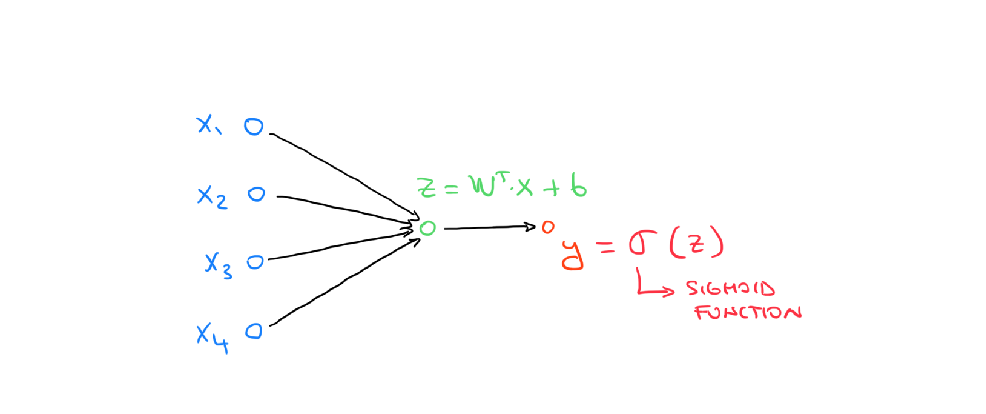

In [0]:
#@title Logistic regression computational path
plot_image(PATH + 'logistic.PNG',12,12)



$Z$ es combinación lineal de los inputs, esta en el dominio $(-\infty, \infty)$ y que al aplicarle la función de transformación, en Redes Neuronales se llama función de activación, devuelve una probabilidad, es decir comprendida entre 0 y 1

Esto seria una neurona, es decir que una red neuronal es un conjunto de combinaciones lineales de los inputs a los que se le aplica una función para que den una probabilidad (en la regresión lineal es el sigmoide) que está entre 0 y 1

In the logistic regression computational graph, there is a n-dimensional input $X$. 

$Z$ is computed as a linear combination of the inputs plus a bias term.

$$Z=W^TX+b$$

The output $Y$ is the sigmoid transformation of $Z$.

$$Y=\sigma\left(Z\right)$$

# Artificial neuron

The computational graph of an artificial neuron is similar to that of logistic regression:

* The artificial neuron receives inputs from its precessors.
* A linear combination of the inputs plus a bias term is computed.
$$Z=W^TX+b$$
* The output of the neuron is a function of the linear combination plus bias.
$$a=g\left(Z\right)$$

The function applied to the linear combination of the inputs (plus bias) is called **activation function**

# One hidden layer artificial neural network

A one hidden layer neural network consists of 3 layers:
* Input layer: is comprised of the input vector $X$ (predictors).
$$a^{[0]}=\underbrace{X}_{n^{[0]}\times 1}$$
* Hiden layer: Layer that connects the input and the output layers. Each neuron generates an output that is a function of a linear transformation of the inputs.


$$\underbrace{a^{[1]}}_{(n^{[1]}\times 1)}=g^{[1]}\left(\underbrace{W^{[1]}}_{(n^{[1]}\times n^{[0]})}\underbrace{a^{[0]}}_{(n^{[0]}\times 1)}+\underbrace{b^{[1]}}_{(n^{[1]}\times 1)}\right)$$

* Output layer: comprised of the output $Y$ (output of either a regression or classification problem). The output is a function of a linear transformation of the previous layer.

$$Y=\underbrace{a^{[2]}}_{(n^{[2]}\times 1)}=g^{[2]}\left(\underbrace{W^{[2]}}_{(n^{[2]}\times n^{[1]})}\underbrace{a^{[1]}}_{(n^{[1]}\times 1)}+\underbrace{b^{[2]}}_{(n^{[2]}\times 1)}\right)$$

Contrary to what happens with linear, ridge and logistic regressions, the error function is not convex with respect to the model parameters. This implies that there might be local minima, although this is not problematic in most applications. That is, local optima still provide good model accuracy.


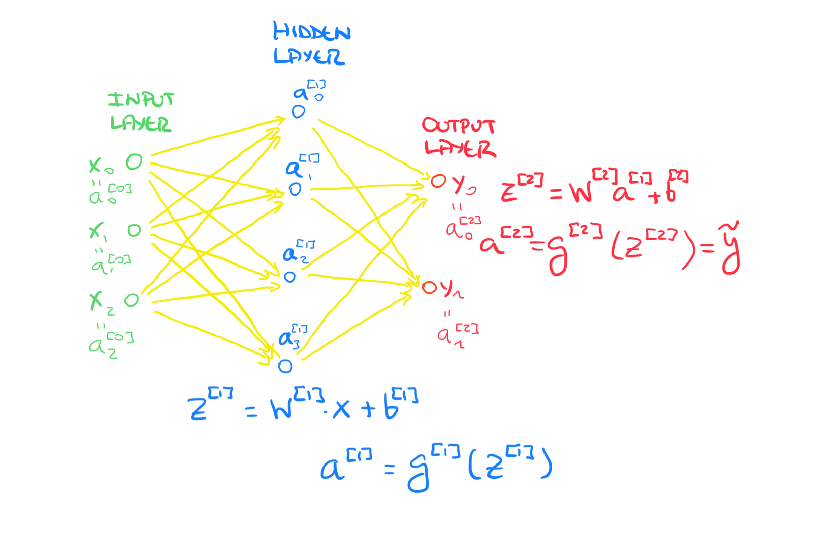

In [0]:
#@title One hidden layer neural network
plot_image(PATH + 'NN_1.PNG',10,10)

Se suelen aplicar para aprendizaje supervisado.

Es decir, hay unos inputs $X$, un output $Y$ (que puede ser regresión o clasificación) y entre medias hay valores intermedios, que son combinación lineal de los inputs mas el termino independiente a la que se le ha realizado la transformación $a^{[i]} = \sum(\omega_{i} * X_{i})$ a la que se le ha realizado una transformación, esto se ha realizado primero para el hidden layer (color azul),  luego, se hace lo mismo para la output layer, es decir, se buscan unos nuevos pesos y se le vuelve a aplicar una nueva función (color rojo)

# Activation functions:

Son las funciones de transformación que se aplican a las combinaciones lineales, es decir, mapean desde $(-\infty, \infty)$ al dominio definido por la función de activación.

Here we describe the most used activation functions:

* Linear: $g\left(z\right)=z$ - El valor de la neurona coincide con $z$
* Sigmoid: $g\left(z\right)=\frac{1}{1+\exp\left(-z\right)}$ - De la regresión logistica
* Relu: $g\left(z\right)= \max(z,0)$
* Leaky Relu: $\left(z\right)= \max(\epsilon z,z),\ \ \epsilon<<1$
* Tanh: $g\left(z\right)=\tanh(x)$ - Dominio, $(-1, 1)$
* Softmax: $a^{[l]}_j=\frac{\exp\left(z^{[l]}_j\right)}{\sum_{k=1}^{n_c}\exp\left(z^{[l]}_k\right)}$



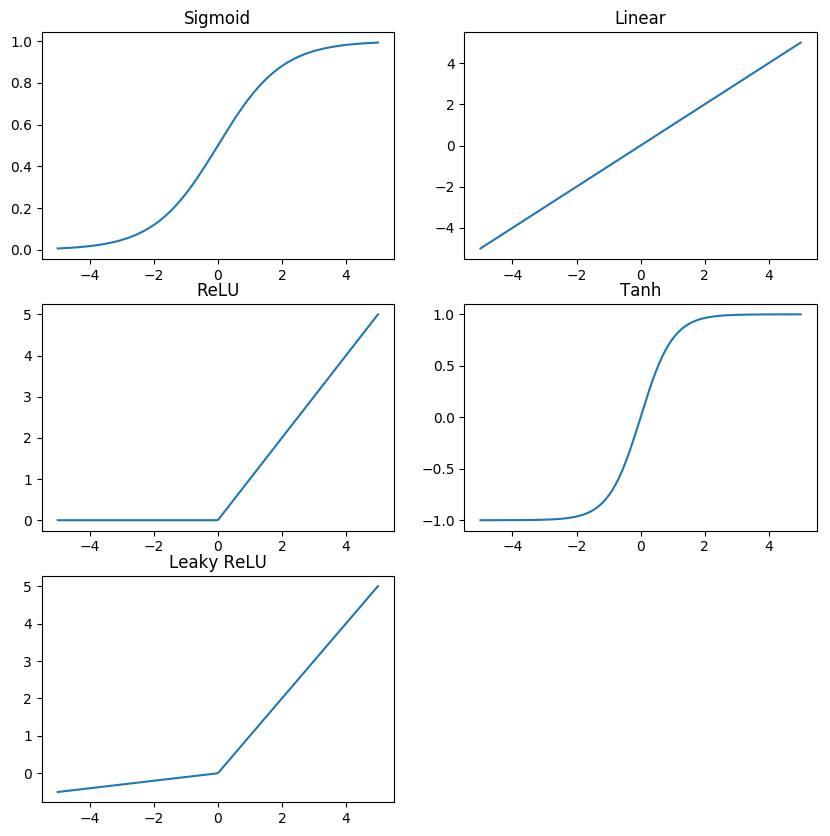

In [0]:
# We represent the different activation functions

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)

z = np.linspace(-5,5,200)

ax1.plot(z,1/(1+np.exp(-z)))
ax2.plot(z,z)
ax3.plot(z,np.maximum(z,0))
ax4.plot(z,np.tanh(z))
ax5.plot(z,np.maximum(z,0.1*z))

ax1.set_title('Sigmoid')
ax2.set_title('Linear')
ax3.set_title('ReLU')
ax4.set_title('Tanh')
ax5.set_title('Leaky ReLU')

f = plt.gcf()

f.set_size_inches(10,10)

The activation function in the output layer must be:

* Linear for regression problems.
* Sigmoid for binary classification. (Es decir, o pertenece a una categoria o no)
* Softmax for multiclass classification. (Cuando hay diversas categorias, perro, gato, raton)

For hidden layers:

* **Linear activations should never be used**. - Porque no se hace nada realmente, ya que los outputs se convertirian en combinaciones lineales de los inputs, lo que equivaldría a hacer una regresión lineal para cada output de los inputs, es decir, la capa hidden no serviria para nada en este caso, solo gasto computacional.
* ReLU is the most widely used, due to its speedup in training.
* Leaky ReLU is an alternative to ReLU that has the advantage of not $0$ gradient for negative values. $\epsilon$ is another hyperparameter to be tuned.
* Sigmoid and Tanh have the disadvantage of negligible gradient as $z\to \pm \infty$, although Tanh is used in some applications (recurrent neural networks).



In the following example, we consider a NN with a one dimensional input, one hidden layer (with 2 neurons) with sigmoid activation functions and a single output variable with linear activation. Notice that higly nonlinear relationships are achieved. 

**NNs are good in reproducing non linear relationships**

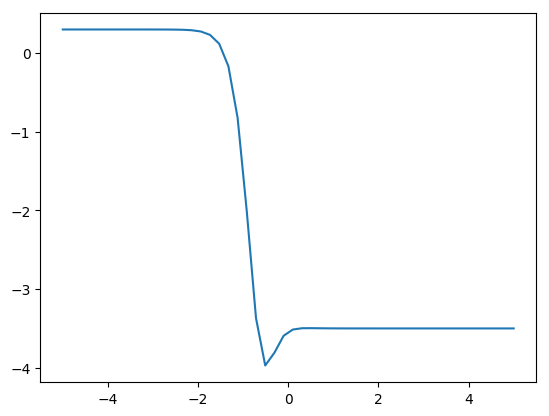

In [0]:
#@title Default title text { run: "auto", vertical-output: true }

#@markdown Parameters hidden layer.

w_1_0 = 4.9 #@param {type:"slider", min:-10, max:10, step:0.1}
W_1_1 = -5.9 #@param {type:"slider", min:-10, max:10, step:0.1}

b_1_0 = 3.8 #@param {type:"slider", min:-10, max:10, step:0.1}
b_1_1 = -2.9 #@param {type:"slider", min:-10, max:10, step:0.1}

#@markdown Parameters output layer.

W_y_0 = -7.9 #@param {type:"slider", min:-10, max:10, step:0.1}
W_y_1 = -4.1 #@param {type:"slider", min:-10, max:10, step:0.1}

b_y_0 = 4.4 #@param {type:"slider", min:-10, max:10, step:0.1}

# We define the sigmoid function
sigmoid = lambda z: 1/(1+np.exp(-z))

# Weight matrixes are built
W_1 = np.array([[w_1_0,W_1_1]]).T
b_1 = np.array([[b_1_0,b_1_1]]).T

W_2 = np.array([[W_y_0, W_y_1]])

# A grid is generated for X
X = np.linspace(-5,5).reshape(1,-1)

# Activations in the hidden layer are computed (sigmoid activation)
A = sigmoid(np.matmul(W_1,X)+b_1)

# Output is computed (linear activation)
Y = np.matmul(W_2,A)+ b_y_0

plt.plot(X[0],Y[0]);

# N-layers neural networks

These are NNs with multiple hidden layers.

NNs with more than 1 hidden layer are called deep neural networks (deep learning).

The optimal number of hidden layers and the number of neurons per layer (network architecture) depends on the problem being solved (and is found through cross validation). 

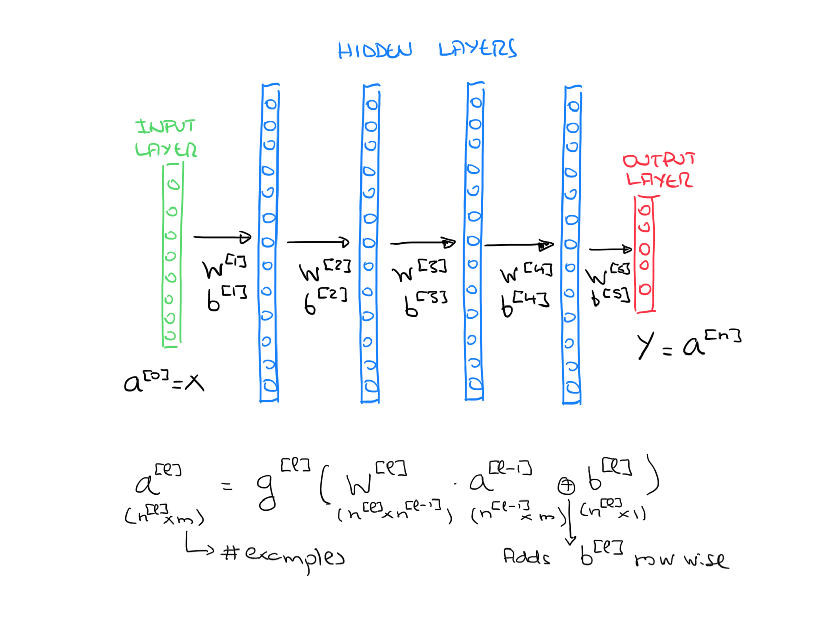

In [0]:
plot_image(PATH + 'NN_Mult.PNG',10,10)

## Number of parameters of a neural network

A hidden layer with $n^{[l-1]}$ neurons in the previous layer and $n^{[l]}$ implies:

* $n^{[l]}$ bias terms included in $b^{[l]}$
* $n^{[l]}\times n^{[l-1]}$ weights included in $W^{[l]}$

## Why linear activation functions are not used in hidden layers?

Let's consider a 1 hidden layer neural network. If we used linear activation functions for the hidden layer:

$$a^{[1]}=W^{[1]}X+b^{[1]}$$

$$a^{[2]}=W^{[2]}a^{[1]}+b^{[2]} =W^{[2]}\left(W^{[1]}X+b^{[1]}\right)+b^{[2]} = W^{[2]}W^{[1]}X+W^{[2]}b^{[1]}+b^{[2]}=WX+b$$

So that $Y$ will be linear (or a sigmoid/softmax transformation) with respect to the inputs. 

Hence, a neural network with linear activation functions in the hidden units is nothing but a linear/logistic/softmax regression. 

# Neural networks training

Due to the high number of parameters, neural networks are trained using gradient descent based algorithms (since computing the Hessian -second derivatives- is unfeasible from a computational standpoint).

The computation of the gradient of the error function with respect to the model parameters is done using   [backward (adjoint) algorithmic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation).

This method consists on performing two different calculations:
* Forward propagation.
* Backpropagation.

## Forward propagation

Given $\underbrace{X}_{(n^X\times m)}$, we go forward in the network, computing the different layers activation values until we reach to the output layer and compute the error:

$$\underbrace{A^{[1]}}_{n^{[1]}\times m}=g^{[1]}\left(\underbrace{W^{[1]}}_{n^{[1]}\times n^{[0]}}X\oplus \underbrace{b^{[1]}}_{n^{[1]}\times 1}\right)$$
$$\vdots$$
$$\underbrace{A^{[l]}}_{n^{[l]}\times m}=g^{[l]}\left(\underbrace{W^{[l]}}_{n^{[l]}\times n^{[l-1]}}A^{[l-1]}\oplus \underbrace{b^{[l]}}_{n^{[l]}\times 1}\right)$$
$$\vdots$$
$$\widetilde{Y}=\underbrace{A^{[L]}}_{n^{[L]}\times m}=g^{[L]}\left(\underbrace{W^{[L]}}_{n^{[L]}\times n^{[L-1]}}A^{[L-1]}\oplus \underbrace{b^{[L]}}_{n^{[L]}\times 1}\right)$$
$$\vdots$$
$$\epsilon = \epsilon\left(Y,\widetilde{Y}\right)$$

Where $m$ is the number of training examples, $A\oplus b$ adds the elements of $b$ row-wise to matrix A, and $\epsilon$ is the loss function used (mean square error for regression problems or categorical cross entropy for classification problems) and $\widetilde{Y}$ the estimation of the model given $X$.

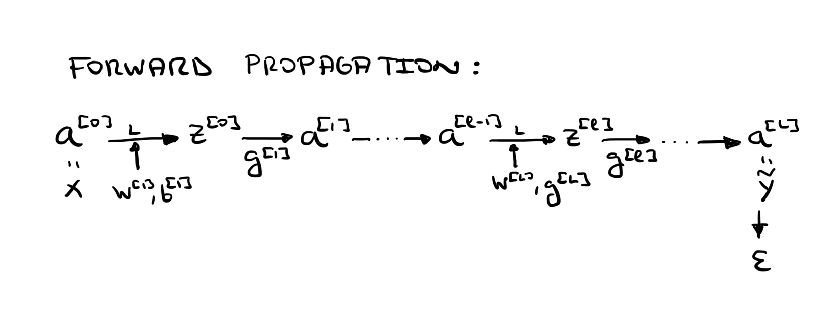

In [0]:
#@title Forward propagation
plot_image(PATH + 'ForwardProp.PNG',10,10)

## Back propagation

Once that the forward loop has been done, we compute the derivatives of the error with respect to the inputs backwards applying the chain rule:

$$\frac{\partial \epsilon}{\partial \widetilde{Y}}$$
$$\Downarrow$$
$$\frac{\partial \epsilon}{\partial Z^{[L]}}=\frac{\partial \widetilde{Y}}{\partial Z^{[L]}}\frac{\partial \epsilon}{\partial \widetilde{Y}}$$
$$\Downarrow$$
$$\frac{\partial \epsilon}{\partial A^{[L-1]}}=\frac{\partial Z^{[L]}}{\partial A^{[L-1]}}\frac{\partial \epsilon}{\partial Z^{[L]}},\ \ \ \frac{\partial \epsilon}{\partial W^{[L]}}=\frac{\partial Z^{[L]}}{\partial W^{[L]}}\frac{\partial \epsilon}{\partial Z^{[L]}},\ \ \ \frac{\partial \epsilon}{\partial b^{[L]}}=\frac{\partial Z^{[L]}}{\partial b^{[L]}}\frac{\partial \epsilon}{\partial Z^{[L]}}$$
$$\vdots$$

All of these expressions have closed form formulas that can be computed through matrix products.

Since both forward and backpropagation imply matrix products, GPUs accelerate the training process for large scale problems. A **GPU is available in Google Colab**.



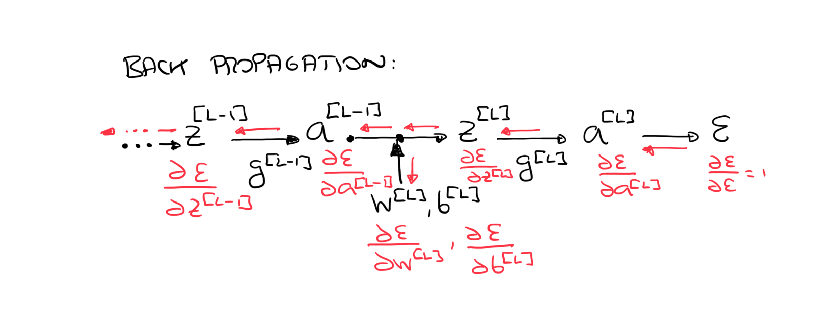

In [0]:
#@title Back propagation
plot_image(PATH + 'BackwardProp.PNG',10,10)

## Minibatch gradient descent

The number of parameters in neural network models can become very large. The complexity of these models is appropiate for large datasets where the relationship between features and output is not linear.

Given the model complexity and the dataset size, instead of using all the training examples to compute each step of the gradient descent algorithm (this is called batch gradient descent) we do the following:

* A minibatch size is selected (typical values are small powers of 2 like 16-32-64-128).
* The training data is split in different subsets (minibatches) containing as many examples as the minibatch size. 
* On each iteration, we only use one minibatch to estimate the gradient of the error function with respect to the model parameters.
* We will update the model parameters (weights and bias terms) with the gradient descent updating formula:
$$\theta_n:=\theta_{n-1}-\alpha\frac{\partial \epsilon}{\partial \theta}$$
* We will carry on using different minibatches until all the training dataset is used.
* The process of using all the training data set is called **epoch**. We will repeat this process $n_{epochs}$ times.
* The number of epochs, appart from the minibatch size, is an hyperparameter of the minibatch gradient descent algorithm.

The idea is that, instead of using all the training data to perform an improvement of the model parameters, which might take too long, we just use a minibatch on each step.

The number of epochs used is of the order of (20-100).

Due to the stochastic nature of it, the  algorithm does not converge to a local minimum (it goes towards a local minimum when the gradient is large but then wanders around it). Error could not improve after a single epoch (although it does after several). 

When the minibatch size is 1, the algorithm is called stochastic gradient descent.


# Adam algorithm

Adams algorith is a variation of minibatch gradient descent that uses the following ingredients:

* Momentum: it reduces the noisiness of the algorithm by estimating the gradient as an exponentially weighted moving average of the gradients found:

$$V^{\theta}_n=\beta_1 V_{n-1}^{\theta} + \left.(1-\beta_1)\frac{\partial \epsilon}{\partial \theta}\right|_n$$

* Variance reduction: minibatch gradients are more noisy in variables with respect which the batch gradient is slow. Therefore an exponentially weighted moving average estimation of the gradients variance is performed:

$$S^{\theta}_n=\beta_2 S_{n-1}^{\theta} + (1-\beta_2)\left(\left.\frac{\partial \epsilon}{\partial \theta}\right|_n\right)^2$$

* The minibatch gradient descent updating formula is modified:

$$\theta_n:=\theta_{n-1}-\alpha_n\frac{V_n^{\theta}}{\sqrt{S_n^{\theta}+\epsilon}}$$

$\epsilon$ is another hyperparameter that avoids dividing by zero.

* Learning rate decay: the learning rate can be reduced as we compute more epochs:

$$\alpha_n=\alpha_0\frac{1}{1+RDn_{epoch}}$$

Adams algo performs well in most NN applications.




In order to compare batch gradient descent, minibatch gradient descent and adam in a low dimensional space, we will compare their convergence in a linear logistic regression problem with one dimensional features. We will use the 2016-2017 NBA shots statistics [NBA Shots](https://www.kaggle.com/dansbecker/nba-shot-logs). We will try to estimate the probability of a made shot given the shot distance.  

The following code allows us to compute Logistic regression, cross entropy, gradient and gradient descent algorithm:

In [0]:
def logistic_cross_entropy(X, Y, theta):
    # Calculates cross entropy cost function
    # theta: model parameters
    # X, Y: predictors and output

    # Model prediction given theta  
    Y_hat = sigmoid(np.matmul(X,theta))

    # Cross entropy cost function
    cost = (-np.matmul(Y.T,np.log(Y_hat)) - np.matmul((1-Y.T),np.log(1-Y_hat)))/len(Y)

    return cost[0,0]

def logistic_gradient(X, Y, theta):
    # Calculates the cross entropy cost function gradient
    # theta: model parameters
    # X, Y: predictors and output

    # Model prediction given theta  
    Y_hat = sigmoid(np.matmul(X,theta))

    # Gradient of cross entropy cost wrt theta
    return (np.matmul(X.T, Y_hat - Y))/len(Y)

def logistic_regress_optim(X,Y, alpha, steps):
    # Performs optimization using gradient descent
    # alpha: learning rate
    # steps: number of optimization steps

    # The output of the function will be a dictionary containing
    # the cost function path, the parameters path and the final 
    # value of the logistic regression parameters
    ret = {}

    cost_evol = []

    # Model params are initialized randomly
    #   theta = np.random.normal(0,1,(X.shape[1],1))
    theta = np.array([[0],[1]])


    # Theta path is initialized
    theta_evol = np.zeros((theta.shape[0], steps+1))
  
    # For every optimization step
    for i in range(steps):
    
        # Current theta value is saved in theta path  
        theta_evol[:,i] = theta[:,0]

        # Cost function is computed
        cost = logistic_cross_entropy(X, Y, theta)

        # Cost path is saved
        cost_evol += [cost] 

        # Gradient is computed 
        grad = logistic_gradient(X, Y, theta)


        # Gradient is saved
        theta = theta - alpha*grad

    # Last theta value is saved in theta path
    theta_evol[:,steps] = theta[:,0] 


    ret['cost_evol'] = cost_evol
    ret['theta'] = theta
    ret['theta_evol'] = theta_evol

    return ret

Adam algorithm (gradient descent is a particular case of it)

In [0]:
def logistic_regress_optim_adam(X,Y, alpha, epochs=20, 
       minibatchsize=32, beta1 = 0.9, beta2 = 0.999, VarianceRed = True):
    # Performs optimization using adam algorithm
    # alpha: learning rate
    # epoch: number of epochs
    # minibatchsize: number of examples to include in each minibatch
    # beta1, beta2: adam hyperparams
    # The output of the function will be a dictionary containing
    # the cost function path, the parameters path and the final 
    # value of the logistic regression parameters
    ret = {}

    cost_evol = []

    # Model params are initialized randomly
    #theta= np.random.normal(0,1,(X.shape[1],1))
    theta = np.array([[0],[1]])


    # Minibatches in batch

    mini_in_batch = int(np.ceil(len(Y)/minibatchsize))

    # Theta path is initialized
    theta_evol = np.zeros((theta.shape[0],epochs*mini_in_batch+1))
    cost_evol = np.zeros(epochs*mini_in_batch+1)

    ewm_grad = 0
    ewm_var = 0

    ep = 1e-9

    count = 0                      
    # For every optimization step
    for i in range(epochs):
    
        clear_output()

        print('Epoch ' + str(i))
    
    for j in range(mini_in_batch):
      
#       if j%50 == 0:
#         print(j,mini_in_batch)
      
        # Current theta value is saved in theta path  
        theta_evol[:,count] = theta[:,0]

        low_index = j*minibatchsize
        up_index = np.minimum((j+1)*minibatchsize,len(Y))

        X_mini = X[low_index:up_index,:]
        Y_mini = Y[low_index:up_index,:]    

        # Cost function is computed
        cost = logistic_cross_entropy(X_mini, Y_mini, theta)

        # Cost path is saved
        cost_evol[count] = cost
        count +=1

        # Gradient is computed 
        grad = logistic_gradient(X_mini, Y_mini, theta)

        ewm_grad = beta1*ewm_grad + (1-beta1)*grad
        ewm_var = beta2*ewm_var + (1-beta2)*np.square(grad) 

        ewm_grad_corr = ewm_grad/(1-beta1**count) 
        ewm_var_corr = ewm_var/(1-beta2**count) 
      
        # Gradient is saved
        if VarianceRed:
            theta = theta - alpha*ewm_grad_corr/np.sqrt(ewm_var_corr+ep)
        else:
            theta = theta - alpha*ewm_grad_corr

    # Last theta value is saved in theta path
    theta_evol[:,epochs*mini_in_batch] = theta[:,0] 


    ret['cost_evol'] = cost_evol
    ret['theta'] = theta
    ret['theta_evol'] = theta_evol

    return ret

The following code represents the batch, minibatch and adam gradient descent path

In [0]:
def plot_optim_plot(X_ones, Y,lg_result):
  
    # This function represents the gradient descent path
    # together with the cost function representation

    num = 30

    # Grid in parameters
    #   theta0 = np.linspace(np.min(lg_result['theta_evol'][0,:]),
    #                        np.max(lg_result['theta_evol'][0,:]), num)
    #   theta1 = np.linspace(np.min(lg_result['theta_evol'][1,:]),
    #                        np.max(lg_result['theta_evol'][1,:]), num)

    theta0 = np.linspace(-1,
                       1, num, True)
    theta1 = np.linspace(-1,
                       1, num, True)


    theta0_Grid, theta1_Grid = np.meshgrid(theta0, theta1)

    # Cross entropy computed for the gris
    log_cross = np.zeros((num,num))

    for i in range(num):
        clear_output()
        print(i,'/',num)
        for j in range(num):
            theta = np.array([[theta0_Grid[i,j]],[theta1_Grid[i,j]]])
            log_cross[i,j] = logistic_cross_entropy(X_ones,Y,theta)



    # Creating the grid plot
    lines = []
    line_marker = dict(color='rgb(50, 50, 255)', width=1)
    for i, j, k in zip(theta0_Grid, theta1_Grid, log_cross):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))
    for i, j, k in zip(theta0_Grid.T, theta1_Grid.T, log_cross.T):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

    # Creating the theta path plot
    line_marker = dict(color='rgb(255, 0, 0)', width=3)
    theta_0 = lg_result['theta_evol'][0,:]
    theta_1 = lg_result['theta_evol'][1,:]

    f = interpolate.interp2d(theta0, theta1, log_cross)

    cost = [f(theta_0[i],theta_1[i])[0] for i in range(len(theta_0))]

    print('done')
  
    lines.append(go.Scatter3d(x=theta_0, y=theta_1, z=cost, mode='lines', line=line_marker))

    layout = go.Layout(
      title='Gradient Descent',
      scene=dict(
          xaxis=dict(
              gridcolor='rgb(0, 0, 0)',
              zerolinecolor='rgb(0, 0, 0)',
              showbackground=True,
              backgroundcolor='rgb(255, 255,255)'
          ),
          yaxis=dict(
              gridcolor='rgb(0, 0, 0)',
              zerolinecolor='rgb(0, 0, 0)',
              showbackground=True,
              backgroundcolor='rgb(255, 255,255)'
          ),
          zaxis=dict(
              gridcolor='rgb(0, 0, 0)',
              zerolinecolor='rgb(0, 0, 0)',
              showbackground=True,
              backgroundcolor='rgb(255, 255,255)'
          )
      ),
      showlegend=False,
    )
  
  

    enable_plotly_in_cell()

    fig = go.Figure(data=lines, layout=layout)
    fig['layout']['scene'].update(go.layout.Scene(aspectmode='cube'))
    iplot(fig, filename='elevations-3d-surface')
  



We read the dataset and preprocess the data

In [0]:
# To scale the data
from sklearn.preprocessing import StandardScaler

# To shuffle the data
from sklearn.utils import shuffle

# We read the file
nba_shots = pd.read_csv(PATH + 'nba-shot-logs.zip')

nba_shots['SHOT_RESULT'] = nba_shots['SHOT_RESULT'].apply(lambda x: 1 
                                                          if x=='made' else 0)

# We give X the right dimensions
X = np.array(nba_shots['SHOT_DIST']).reshape(-1,1)

# We scale the features
X = StandardScaler().fit_transform(X)

# We add a columns of 1s to X
X = np.hstack((X, np.ones((len(nba_shots['SHOT_DIST']),1))))

# We give X the right dimensions
Y = np.array(nba_shots['SHOT_RESULT']).reshape(-1,1)

X, Y = shuffle(X,Y)



We run batch gradient descent with a learning rate of 0.001 and 100 iterations. This learning rate is too low, but helps us to explore the dificulties of the gradient descent algorithm and compare it to the performance of minibatch and adam algorithms

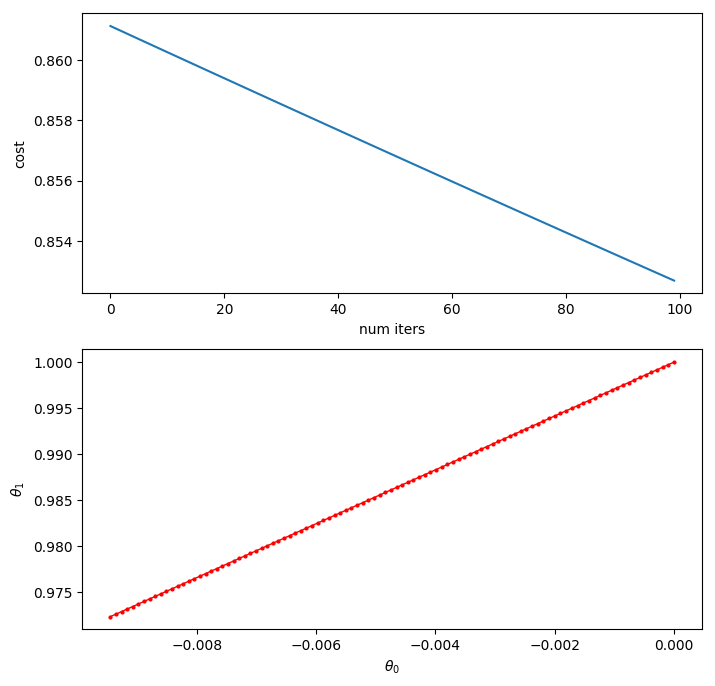

In [0]:
lg_result = logistic_regress_optim(X, Y, 0.001, 100) # la incremento a 0.1 y veo como se estabiliza la funcion de coste

f, ax = plt.subplots(2,1)

# We plot the cost function as a function of the optimization steps
ax[0].plot(lg_result['cost_evol']);
ax[0].set_xlabel('num iters')
ax[0].set_ylabel('cost')

# We also plot the evolution of the parameters 
ax[1].plot(lg_result['theta_evol'][0], lg_result['theta_evol'][1], '-o', 
           color='red', markersize = 2, linewidth=1);
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')


f.set_size_inches(8,8);

In [0]:
plot_optim_plot(X,Y,lg_result)

Output hidden; open in https://colab.research.google.com to view.

La linea roja indica desde donde empieza, hasta donde va (buscamos que llegue al minimo).

La grafica azul es la función de coste (es decir, la funcion de error)

Notice that we are too far from the optimum. The learning rate should be increased, something that could not be possible in other problems.

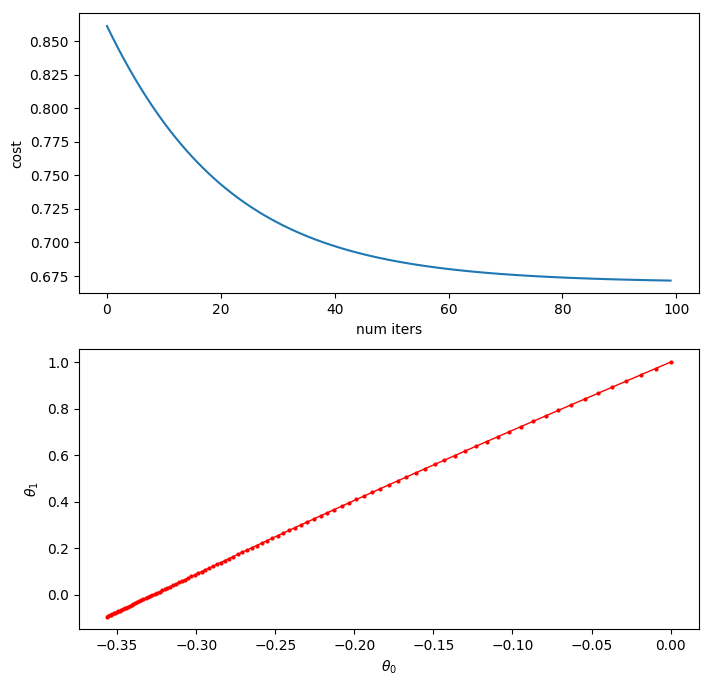

In [0]:
lg_result = logistic_regress_optim(X, Y, 0.1, 100)

f, ax = plt.subplots(2,1)

# We plot the cost function as a function of the optimization steps
ax[0].plot(lg_result['cost_evol']);
ax[0].set_xlabel('num iters')
ax[0].set_ylabel('cost')

# We also plot the evolution of the parameters 
ax[1].plot(lg_result['theta_evol'][0], lg_result['theta_evol'][1], '-o', 
           color='red', markersize = 2, linewidth=1);
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')


f.set_size_inches(8,8);

In [0]:
plot_optim_plot(X,Y,lg_result)

Output hidden; open in https://colab.research.google.com to view.

With a learning rate of $0.1$ and $100$ iterations, we seem to be close to the optimum. Notice that in order to do so, we had to go over the whole dataset $100$ times.

Let's now try a singe epoch of minibatch gradient descent with a minibatch size of $32$ examples. Notice that with the $0.01$ learning rate, we approach the minimum although we go over the whole dataset only once. Notice that the algorithm does not converge. It wanders around the optimum. 

Notice also that in $\theta_0$, the algorithm goes back and forth.

Epoch 0


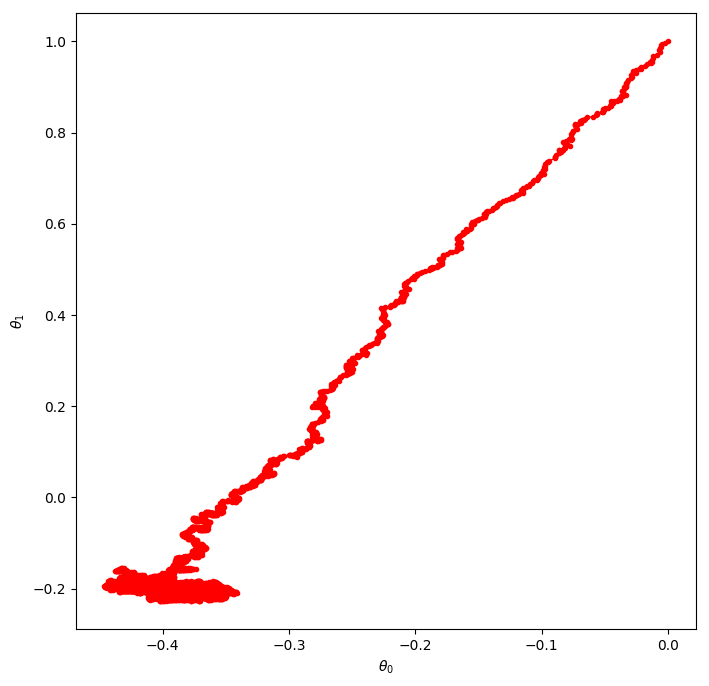

In [0]:

lg_result = logistic_regress_optim_adam(X, Y, alpha =0.01, epochs = 1, minibatchsize = 16, 
                                       beta1 = 0, beta2 = 0, VarianceRed=False)

# alpha - Tasa de aprendizaje
# minibatch - por cuanto divido el dataset total
# epochs - Cuantas veces paso por todos los datos (si epochs = 2, quiere decir que paso 2 veces por todos los datos para minimizar)

f, ax = plt.subplots(1)

# We also plot the evolution of the parameters 
ax.plot(lg_result['theta_evol'][0], lg_result['theta_evol'][1], '-o', 
           color='red', markersize = 3, linewidth=1);
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')


f.set_size_inches(8,8);

In [0]:
plot_optim_plot(X,Y,lg_result)

Output hidden; open in https://colab.research.google.com to view.

We now use adam. Notice that the descent path is not so noisy. We approach the minimum area with less iterations.


Epoch 0


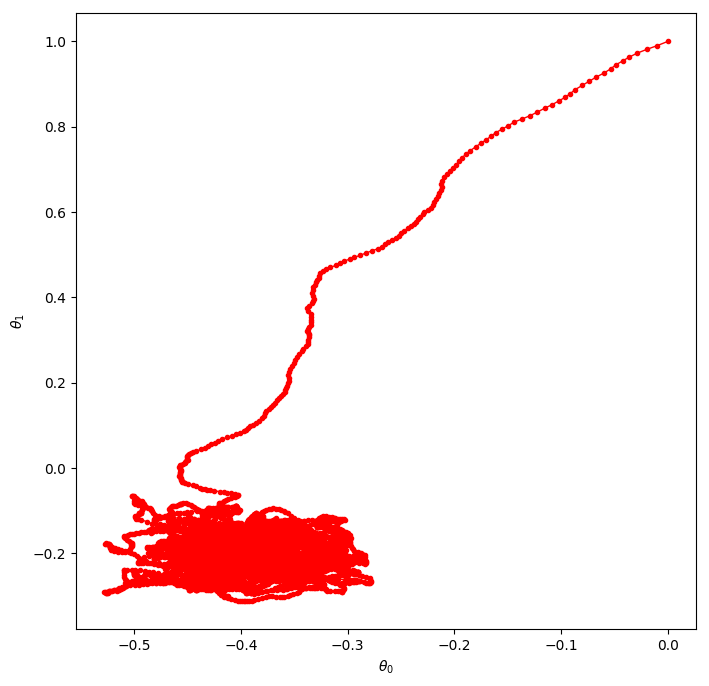

In [0]:

lg_result = logistic_regress_optim_adam(X, Y, alpha =0.01, epochs = 1, minibatchsize = 16, 
                                       beta1 = 0.9, beta2 = 0.999, VarianceRed=True)

f, ax = plt.subplots(1)

# We also plot the evolution of the parameters 
ax.plot(lg_result['theta_evol'][0], lg_result['theta_evol'][1], '-o', 
           color='red', markersize = 3, linewidth=1);
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')


f.set_size_inches(8,8);

La maraña indica que esta volviendo sobre si mismo, es decir, que merodea el optimo, pero no converge, es decir no llega exactamene al optimo, sino que se queda en el entorno, si la tasa de aprendizaje es muy grande en este caso, mayor será el ruido del zigzagueo al rededor del punto optimo

Si reduzco alpha a 0.001 habrá menos zigzagueo

Que la mancha final sea grande NO ES BUENO

El algoritmo ADAM va reduciendo con el tiempo la tasa de aprendizaje, para evitar los zigzagueos finales cuando estamos cerca de la zona optima

In [0]:
plot_optim_plot(X,Y,lg_result)

Output hidden; open in https://colab.research.google.com to view.

# Params initialization:

Los b - terminos independientes - se pueden inicializar a cero

Los pesos se tienen que inicializar de forma aleatoria

Consider a NN with equal weights, for every neuron, per layer. Let's consider also  bias terms equal to $0$. Notice that the output, and consequently the error term, will be symetric with respect to the value of each neuron within the same layer. This implies that the gradient will be the same for every weight within the same layer. This implies that gradient descent will update every weight within a layer by the same amount on each iteration, so that we will converge to a poor model. To avoid this, weights are initialized randomly.

In the initialization process, we would not want the activation functions of the different neurons to become either too big (might lead to vanishing or exploding gradients) or too small (equivalent to 0 weight initialization). Notice that for layer $l$:

$$z_k^{[l]}=\sum_{j=1}^{n^{[l-1]}}W^{[l]}_{kj}a_j^{[l-1]}+b_k^{[l]}$$

Assuming that $a_j^{[l-1]}$ are independent and equally distributed:

$$Var\left[z_k^{[l]}\right]=n^{[l-1]}Var\left[W^{[l]}\right]Var\left[a^{[l-1]}\right]$$

And if we wanted $Var\left[z_k^{[l]}\right]$ to be  the same order as  $Var\left[a^{[l-1]}\right]$:

$$Var\left[W^{[l]}\right]=\frac{1}{n^{[l-1]}}$$

So that weights are initialized as $N\left(0,\sqrt{\frac{1}{n^{[l-1]}}}\right)$ for sigmoid or tanh activations. For ReLU $N\left(0,\sqrt{\frac{2}{n^{[l-1]}}}\right)$ is used.

Sometimes $\frac{n^{[l-1]}+n^{[l]}}{2}$ is used instead of $n^{[l-1]}$

# Training a neural network with Keras:

Tensor flow es un motor de calculo para las redes neuronales

[Keras](https://keras.io/) is a neural networks API written in Python that runs on top of different NN engines ([Tensorflow](https://www.tensorflow.org/) being one of them). It is compatible with Scikit learn and enables the definition of neural networks of different architectures with a few lines of code.

Let's use it to fit a non linear problem: we will consider the following:

$$Z=\sin\left(\sqrt{X^2+Y^2}\right)+\epsilon$$

$$\epsilon\sim N(0,\sigma)$$



In [0]:
def plot_points_predict(simul_results):
  
    # This funtion does a 3D plot of the data and the model prediction
    # simul_results must be a dictionary with the following structure
    # simul_results = dict(X1=X,X2=Y,Y=Z,model = model)

    lines = []
    # We find the minimum and maximum values of X1 & X2
    x1_min = np.min(simul_results['X1'])
    x1_max = np.max(simul_results['X1'])

    x2_min = np.min(simul_results['X2'])
    x2_max = np.max(simul_results['X2'])

    # We generate a 2D grid of X1 and X2
    X1_Grid = np.linspace(x1_min, x1_max, 50)
    X2_Grid = np.linspace(x2_min, x2_max, 50)
    X1_Grid, X2_Grid = np.meshgrid(X1_Grid, X2_Grid)

    # We initialize the 2D Y prediction of the model
    Y_Grid = np.zeros((50,50))

    # We iterate over the 2D grid of X1 and X2 and obtain the model
    # prediction
    for i in range(50):
        for j in range(50):
            Y_Grid[i,j] = simul_results['model'].predict(np.array([X1_Grid[i,j], X2_Grid[i,j]]).reshape(1,-1))


    # We create the model prediction plot

    line_marker = dict(color='rgb(50, 50, 255)', width=2)
    for i, j, k in zip(X1_Grid, X2_Grid, Y_Grid):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))
    for i, j, k in zip(X1_Grid.T, X2_Grid.T, Y_Grid.T):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

    # We create the 3D scatter plot
    trace1 = go.Scatter3d(
        x=simul_results['X1'].reshape(-1,),
        y=simul_results['X2'].reshape(-1,),
        z=simul_results['Y'].reshape(-1,),
        mode='markers',
        marker=dict(
            size=1.5,
            color= 'grey',# simul_results['Y'].reshape(-1,), # set color to an array/list of desired values
            #colorscale='Portland',   # choose a colorscale
            opacity=1.0
        )
    )

    lines.append(trace1)

    # We define the layout
    layout2 = go.Layout(
                      scene = dict(
                      xaxis = dict(
                          title='X', color = 'black'),
                      yaxis = dict(
                          title='Y', color = 'black'),
                      zaxis = dict(
                          title='Z', color = 'black'),),
                      width=700,
                      margin=dict(
                      r=20, b=10,
                      l=10, t=10),
                      showlegend=False,
                    )
  
    enable_plotly_in_cell()

    # We do the plot
    fig = go.Figure(data=lines, layout=layout2)
    iplot(fig, filename='elevations-3d-surface')



In [0]:
def plot_2models(func,model,x1_lims,x2_lims):
  
    # This funtion does a 3D plot of the true relationship
    # together with the model prediction
    # func: model functor


    lines = []
    # We find the minimum and maximum values of X1 & X2
    x1_min = x1_lims[0]
    x1_max = x1_lims[1]

    x2_min = x2_lims[0]
    x2_max = x2_lims[1]

    # We generate a 2D grid of X1 and X2
    X1_Grid = np.linspace(x1_min, x1_max, 100)
    X2_Grid = np.linspace(x2_min, x2_max, 100)
    X1_Grid, X2_Grid = np.meshgrid(X1_Grid, X2_Grid)

    # We initialize the 2D Y prediction of the model
    Y_Model = np.zeros((100,100))
    Y_Func = np.zeros((100,100))

    # We iterate over the 2D grid of X1 and X2 and obtain the model
    # prediction
    for i in range(100):
        for j in range(100):
            Y_Model[i,j] = model.predict(np.array([X1_Grid[i,j], X2_Grid[i,j]]).reshape(1,-1))
            Y_Func[i,j] = func(X1_Grid[i,j], X2_Grid[i,j])

      

    # We create the model prediction plot

    line_marker = dict(color='rgb(50, 50, 255)', width=2)
    for i, j, k in zip(X1_Grid, X2_Grid, Y_Model):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))
    for i, j, k in zip(X1_Grid.T, X2_Grid.T, Y_Model.T):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

    line_marker = dict(color='rgb(0, 255, 0)', width=2)
    for i, j, k in zip(X1_Grid, X2_Grid, Y_Func):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))
    for i, j, k in zip(X1_Grid.T, X2_Grid.T, Y_Func.T):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

 

    # We define the layout
    layout2 = go.Layout(
                      scene = dict(
                      xaxis = dict(
                          title='X1', color = 'black'),
                      yaxis = dict(
                          title='X2', color = 'black'),
                      zaxis = dict(
                          title='Y', color = 'black'),),
                      width=700,
                      margin=dict(
                      r=20, b=10,
                      l=10, t=10),
                      showlegend=False,
                    )
  
    enable_plotly_in_cell()

    # We do the plot
    fig = go.Figure(data=lines, layout=layout2)
    iplot(fig, filename='elevations-3d-surface')





Let's simulate the data

In [0]:
# We import test train split
from sklearn.model_selection import train_test_split


# We simulate the data - Todo son datos aleatorios creados
ep = 0.3 # error term - Este es el error que estoy intentando obtener - al minimizar el error cuadratico es 0.9
# si ponemos ep = 0, se queda la función en sin() y este modelo funcionaria muy bien (con las cuatro capas)
num = 20000 #num poins

X = np.random.uniform(-4*np.pi,4*np.pi, (num,1))
Y = np.random.uniform(-4*np.pi,4*np.pi, (num,1))

XXX = np.hstack((X,Y))

Z = np.sin(np.sqrt(X**2+Y**2))+ ep*np.random.normal(0,1,(num,1))


Let's define and test the model. We will use a single layer with 1024 neurons a minibatch size of 32 and 20 epochs.

In [0]:
# We import the hollowing ingredients
from keras.models import Sequential # NN standard model - Todos los modelos que se aplican son secuenciales en general
from keras.layers import Dense # Dense NN layer (explained in the course) - Todas las neuronas estan relacionadas con la anterior

# We create a sequential model
model = Sequential()

# Existe una sola capa oculta
model.add(Dense(1024, input_dim=2, activation='relu')) # input_dim = 2 (X e Y) 
model.add(Dense(1, activation='linear')) 


model.compile(loss='mean_squared_error', optimizer='adam') # loss - la función objetivo a minimizar # optim usamos el adam 
# El error, al utilizar optimizador adam, puede crecer por su propia configuracion
# En este caso el erro cuadratico medio es la funcion de error

# Let's fit the model 
model_fit_results = model.fit(XXX,Z,batch_size=32,epochs=20, verbose=1, validation_split=0.1) # fitea (model.predict) - Predice

# Pasa 20 veces por todos los datos

clear_output()

In [0]:
(model.predict(XXX, batch_size=32))

20000

In [0]:
model.evaluate(XXX, Z, batch_size=32)

20000/20000 [==============================] - 1s 33us/step


0.10434906220436097

We plot the mean square error as a function of the epochs.

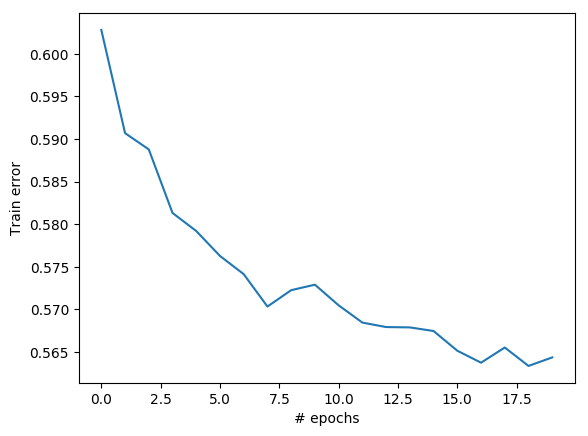

In [0]:
plt.plot(model_fit_results.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('Train error');


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3072      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


We can see that the model converges slowly and the error is much larger than expected $0.3^2=0.09$

In [0]:
simul_results = dict(X1=X,X2=Y,Y=Z,model = model)
plot_points_predict(simul_results)

# Error de biass - modelo demasiado simple

Output hidden; open in https://colab.research.google.com to view.

And the model fits poorly.

Let's try a deep model with 4 hidden layers (with 32 neurons each), a minibatch size of 32 and 20 epochs.

In [0]:
from keras.optimizers import adam

# We create a sequential model
model = Sequential() # Modelo secuencial

# Let's add a hidden layer with 128 neurons
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear')) # Esta es la capa del output, que es lineal, es 1 por que el resultado es simplemente lo del seno

# Tiene cuatra capas oculta, cada una con 128 neuronas, modelo de activación relu, menos la ultima que es lineal y solo tiene una neurona
# El error que se busca es 0.03^2

model.compile(loss='mean_squared_error', optimizer='adam')


# Let's fit the model 
model_fit_results = model.fit(XXX,Z,batch_size=32,epochs=20, verbose=1, validation_split=0.1)

clear_output()

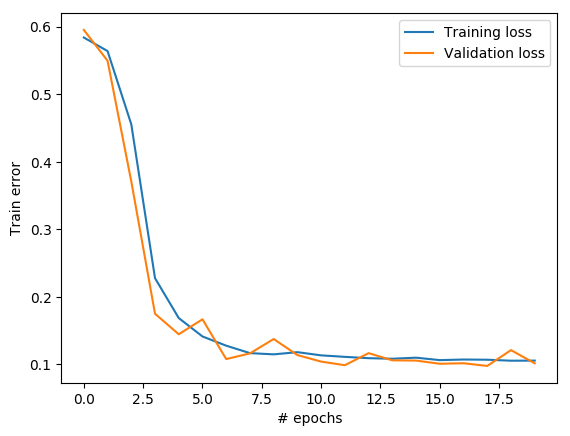

In [0]:
plt.plot(model_fit_results.history['loss'], label = 'Training loss')
plt.plot(model_fit_results.history['val_loss'], label = 'Validation loss')

plt.legend()

plt.xlabel('# epochs')
plt.ylabel('Train error');

The error converges quickly to the expected error and the quality of the fit improves dramatically 

In [0]:
simul_results = dict(X1=X,X2=Y,Y=Z,model = model)
plot_points_predict(simul_results)

Output hidden; open in https://colab.research.google.com to view.

Los datos son los puntitos

La estimación es la cosa azul

El modelo, a base de muchos ejemplos, es capaz de ajustarse bien

Let's plot both the true model and the model predicted by the NN

In [0]:
plot_2models(lambda x,y: np.sin(np.sqrt(x**2+y**2)),model,(-4*np.pi,4*np.pi),(-4*np.pi,4*np.pi))

# Pinta tanto la función original (sin...) y lo que generaria el modelo (en azul)

Output hidden; open in https://colab.research.google.com to view.

And the same comparison plot in 2D:

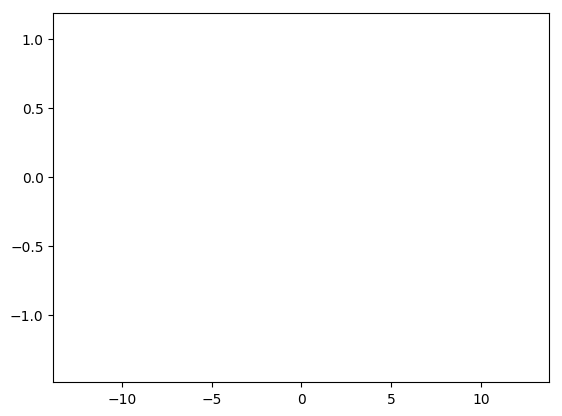

In [0]:
f, ax = plt.subplots()

camera = Camera(f)


X1 = np.linspace(-4*np.pi,4*np.pi,100, True).reshape(-1,1)

for i in range(100):

    X2 = X1[i] *np.ones((100,1))

    XXX = np.hstack((X1,X2))

    Z1 = (lambda x,y: np.sin(np.sqrt(x**2+y**2)))(X1,X2)
    Z2 = model.predict(XXX)


    ax.plot(X1,Z1, color='blue')
    ax.plot(X1,Z2, color='red')


    camera.snap()

ani = camera.animate()



In [0]:
HTML(ani.to_jshtml())

# Avanza desde - 4pi hasta 4pi

# Roja - Red Neuronal
# Azul - la función original Sin()

Output hidden; open in https://colab.research.google.com to view.

# Dropout

Dropout is a widely used regularization technique for NNs. The idea is to get rid of some neurons activation randomly with a given probability. If we apply dropout to layer $l$:

$$a^{[l]}:=\frac{a^{[l]}1_{\{U^{[l]}>p\}}}{p}$$

Where $U^{[l]}$ is an $n^{[l]}$ dimensional uniform and $1_{\{U^{[l]}>p\}}$ is an element wise comparison.

We divide by $p$ to preserve the mean.

# Financial application: neural network representation of a financial model

Tengo unos parametros de modelo que me dan unas vanillas de modelo, y tenemos que calibrar el modelo, es decir buscar los paramtros que hacen que me los vanillas de modelo, sean iguales a los vanillas de mercado (los precios)

$$\theta \rightarrow Vanillas^{modelo}$$

Se buscan los $\theta$ que me den precios de $Vanillas^{modelo} = Vanillas^{mercado}$

Otra opción es generar muchos $\theta$ que me dan muchos Vanillas, le meto una red neuronal

In quantitative finance, models where a closed form formula for vanillas is not available are traditionally avoided. This is due to the fact that, under such circumstance, the calibration process is prohibitive from a computational standpoint.

As we have seen so far, NNs are good interpolators of non linear relationships in high dimensions, so that we could:

* Generate model parameters randomly.
* Generate vanilla prices for those random parameters using the computationally expensive algorithm (Montecarlo, PDE).
* Generate many examples of these model parameters, vanilla pricers pairs.
* Train a NN having model parameters as inputs and vanilla pricers as outputs.

By doing so, we would have a NN representation of our financial model that we could use to calibrate it.

## SABR model

The [SABR volatility model](https://en.wikipedia.org/wiki/SABR_volatility_model)  is a stochastic volatility model that tries to capture the smile of volatility markets. It is widely used in interest rates. Although no closed form expressions exists, an aproximated formula (Hagan formula is used). Nevertheless, we will try to fit a neural network to the SABR model. 

In [0]:
def normal_vol(k, f, t, Alpha, beta, Rho, Nu, shift):
  
    # Hagan formula for normal volatility
    # k: strike
    # f: forward
    # t: time to maturity
    # Alpha: alpha parameter (smile level)
    # beta: beta parameter (backbone control)
    # Rho: rho parameter (skew)
    # Nu: nu parameter (curvature)
    # shift: shift to allow negative rates

    f += shift
    k += shift


    tol = 0.0000000001

    f_av = 0.5 * (f + k)
    gamma_1 = beta / (f_av )
    gamma_2 = -1.0 * beta * (1 - beta) / ((f_av ) * (f_av )) 
    zeta = (Nu / Alpha) * (f - k) / (f_av**beta)
    int_denom = (1 / (1 - beta)) * (f ** (1 - beta)  - k **(1 - beta) )

    x_cir = np.log((np.sqrt(1 - 2 * Rho * zeta + zeta *zeta) + zeta - Rho) / (1 - Rho))

    SABRTerms = 1.0 + ((2.0 * gamma_2 - gamma_1 *gamma_1) / 24.0 * Alpha * Alpha * (f_av ** (2.0 * beta ) ) + \
      (1.0 / 4.0) * Rho * Nu * Alpha * gamma_1 * (f_av ** beta) + \
      (2.0 - 3.0 * Rho * Rho) * Nu * Nu / 24.0) * t


    auxPow = (f_av ** beta)
    auxLog = np.log(f_av )
    
    
    if np.abs( zeta ) <= tol:
        Vol = Alpha * (f ** beta) * SABRTerms
    else :
        Vol = Alpha * ((f - k) / int_denom) * (zeta / x_cir) * SABRTerms
    
    
    return Vol

(0, 150)

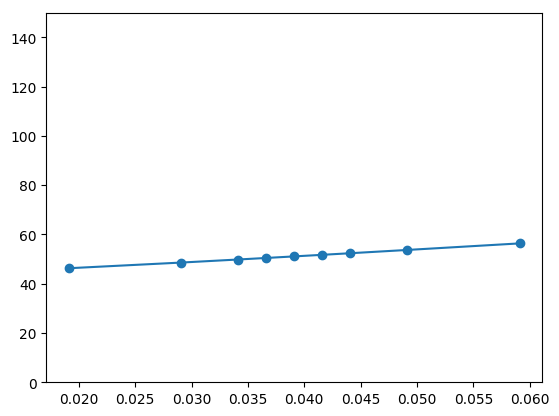

In [0]:
#@title SABR model { run: "auto" }
forward = 0.0391 #@param {type:"slider", min:0.02, max:0.1, step:0.0001}
ttm = 11.764 #@param {type:"slider", min:0.001, max:30, step:0.001}
alpha = 0.0051 #@param {type:"slider", min:0.0001, max:0.0120, step:0.001}
rho = 0.682 #@param {type:"slider", min:-0.99, max:0.99, step:0.001}
nu = 0.075 #@param {type:"slider", min:0, max:1.5, step:0.001}
beta = 0 #@param {type:"slider", min:0, max:1, step:0.001}

strikes = forward + np.array([-200/10000, -100/10000, -50/10000, -25/10000, 0, 25/10000, 50/10000, 100/10000, 200/10000])


v = np.array([normal_vol(x,forward,ttm,alpha,beta,rho,nu,0) for x in strikes])

plt.plot(strikes, v*10000,'o-')

lims = plt.ylim()

#plt.ylim(0,lims[1]*1.1)

plt.ylim(0,150)

We simulate the following parameters: $Forward, \ \alpha,\ \rho, \ \nu$. We generate the volatility smile for $ATM\pm [25 ,50, 100, 150, 200]pb$

Our neural network will have $5$ dimensional input and $9$ dimensional output.

In [0]:
# Numer of simulations
num = 20000

# every parameter simulated uniformly
alpha = np.random.uniform(1/10000, 120/10000,num)#0.0001,0.02, num) # de uno a sesenta puntos basicos
beta = 0 # En la sala se usa beta = 0.3 (30%)
forward = np.random.uniform(-0.005,0.07, num)
rho = np.random.uniform(-0.99,0.99, num) #if np.random.uniform()>0.2 else 0
nu = np.random.uniform(0,1, num) #if #np.random.uniform()>0.2 else 0
ttm = 10#np.random.uniform(1/52,30, num)
# Seran los inputs de la red neuronal

# Strikes
strikes = np.array([-200, -150, -100, -50, -25, 0, 25, 50, 100, 150, 200])/10000
# Seran los outputs de la red neuronal

# Vols output is initialized
vol = np.zeros((num, len(strikes)))

# Vols are computed using the Hagan formula
for i in range(num):
  
    for j in range(len(strikes)):
  
        vol[i,j] = normal_vol(forward[i]+ strikes[j], forward[i], ttm, alpha[i], beta, rho[i], nu[i], 0)
    
X = np.vstack((alpha, forward, rho, nu)).T
Y = vol


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning:

invalid value encountered in log



We plot the 1st 1000 smiles

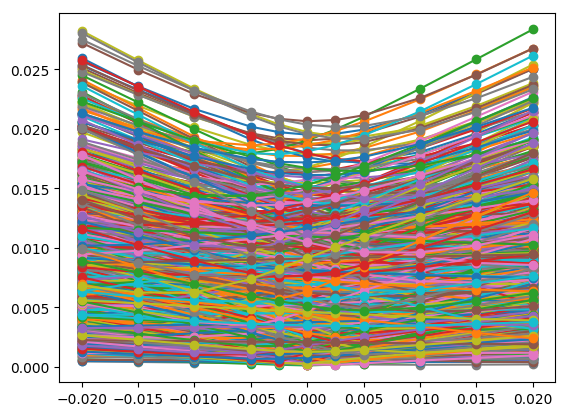

In [0]:

plt.plot(strikes,vol[0:1000,:].T,'o-');
# Vol en terminos de vol normal - el rango es bueno para los datos en los que estamos

## Putting a Keras object in a Scikit Learn pipeline

If we want to perform cross validation on a Keras model, we need to be able to integrate in in a Scikit Learn pipeline.

In order to do so, we must first create a function that returns the model.

In [0]:
from keras import backend as Keras_Session
from keras.layers.core import Dropout

def bpvol_error(y_true, y_pred):
    return Keras_Session.sqrt(Keras_Session.mean(Keras_Session.square(y_pred - y_true), axis=-1))

# Lo utilizaremos bpvol_error como metrica a la que aplicarle el mean_squared_error

def CreateModel(input_dim, output_dim, num_hidden_layers, neurons_layer, drop_out_prob):
  
    
    Keras_Session.clear_session()
    # We create a sequential model
    model = Sequential()

    # Let's add a input layer
    model.add(Dense(neurons_layer, input_dim=input_dim, activation='relu'))
    model.add(Dropout(drop_out_prob)) # dropout
  
    for i in range(num_hidden_layers):
        # let's add hidden layers
        model.add(Dense(neurons_layer, activation='relu')) # el numero de inputs en este caso es cuatro (los parametros del modelo saber)
        model.add(Dropout(rate = drop_out_prob)) # dropout  - Ultima capa es el output en este caso es 11 porque son los strikes len(strikes)
        # en el modelo anterior era solo uno por que Z = sin(root(x2+y2) + epsilon) - vamos que sale un solo punto
        # en redes neuronales, el nuemro de inputs y de outputs, no tienen por que coincidir
 
    model.add(Dense(output_dim, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics = [bpvol_error]) # Se ha definido el error - la metrica
    
    return model
  

In [0]:
model = CreateModel(5,9,6,32,0.2) 

# Tiene seis capas
# Tiene cinco inputs
# Tiene nueve outputs

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                192       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
__________

Use the wrappers ([Keras Regressor and Keras Clasifier](https://keras.io/scikit-learn-api/):

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV



test_fold = [0 if (i+1)/len(X) > 0.9 else -1 for i in range(len(X))]
ps = PredefinedSplit(test_fold) 

NN_model = KerasRegressor(build_fn=CreateModel, verbose=1,epochs=30, batch_size=32)
# Utiliza como modelo el createmodel que definimos anteriormente

# CreateModel(input_dim =5, output_dim = 9, num_hidden_layers=6, neurons_layer = 32)

scaler = StandardScaler()

scaler.fit(X[:,0:18000])

steps = [('scaler',scaler),('NN', NN_model)]

model = Pipeline(steps = steps)


drop_out_prob = [0]

param_grid = dict(NN__input_dim = [4], NN__output_dim = [11], \
                  NN__num_hidden_layers = [4], NN__neurons_layer = [128], NN__drop_out_prob = drop_out_prob)

model = GridSearchCV(estimator=model, param_grid=param_grid, cv = ps, refit = True)

model.fit(X,Y)

    
#     NN__drop_out_prob=drop_out_prob, 
#       num_conv_layers=num_conv_layers, 
#       num_dense_layers=num_dense_layers, num_dense_neurons=num_dense_neurons)




Epoch 1/30
18000/18000 [==============================] - 2s 131us/step - loss: 1.5527e-05 - bpvol_error: 0.0023
Epoch 2/30
18000/18000 [==============================] - 2s 108us/step - loss: 9.0680e-07 - bpvol_error: 8.9435e-04
Epoch 3/30
18000/18000 [==============================] - 2s 108us/step - loss: 5.6704e-07 - bpvol_error: 7.0645e-04
Epoch 4/30
18000/18000 [==============================] - 2s 107us/step - loss: 3.9702e-07 - bpvol_error: 5.9088e-04
Epoch 5/30
18000/18000 [==============================] - 2s 105us/step - loss: 3.2997e-07 - bpvol_error: 5.3354e-04
Epoch 6/30
18000/18000 [==============================] - 2s 107us/step - loss: 2.5129e-07 - bpvol_error: 4.6652e-04
Epoch 7/30
18000/18000 [==============================] - 2s 110us/step - loss: 2.2037e-07 - bpvol_error: 4.3273e-04
Epoch 8/30
18000/18000 [==============================] - 2s 108us/step - loss: 1.6170e-07 - bpvol_error: 3.7358e-04
Epoch 9/30
18000/18000 [==============================] - 2s 110us/s

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('NN',
                                        <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f0836c575f8>)],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'NN__drop_out_prob': [0], 'NN__input_dim': [4],
                         'NN__neurons_layer': [128],
                         'NN__num_hidden_layers': [4], 'NN__output_dim': [11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
model.best_params_

{'NN__drop_out_prob': 0,
 'NN__input_dim': 4,
 'NN__neurons_layer': 128,
 'NN__num_hidden_layers': 4,
 'NN__output_dim': 11}

In [0]:
Y_pred = model.predict(X)

20000/20000 [==============================] - 1s 33us/step


(0, 0.020839221349072155)

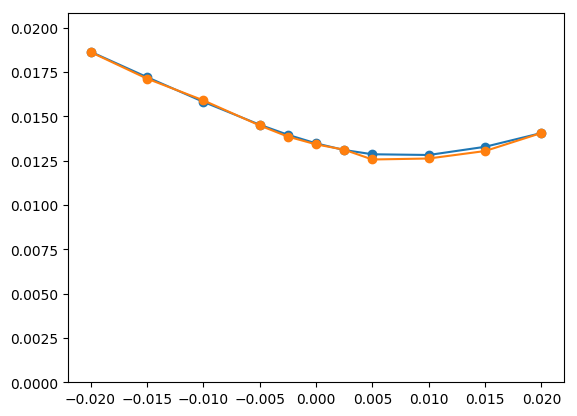

In [0]:
i = np.random.randint(0,20000)

plt.plot(strikes,vol[i,:],'o-') 
plt.plot(strikes, Y_pred[i,:],'o-')

ax =  plt.gca()

aaa = ax.set_ylim()

ax.set_ylim(0,aaa[1]*1.1)

In [0]:
X_norm = StandardScaler().fit_transform(X)

model = CreateModel(4,11,4,128,0)

model_fit_hist = model.fit(X_norm, Y, verbose=1,epochs=100, batch_size=32)


Epoch 1/100
20000/20000 [==============================] - 2s 119us/step - loss: 2.5989e-05 - bpvol_error: 0.0022
Epoch 2/100
20000/20000 [==============================] - 2s 107us/step - loss: 7.1687e-07 - bpvol_error: 7.9305e-04
Epoch 3/100
20000/20000 [==============================] - 2s 106us/step - loss: 4.1724e-07 - bpvol_error: 6.0408e-04
Epoch 4/100
20000/20000 [==============================] - 2s 105us/step - loss: 2.9462e-07 - bpvol_error: 5.0688e-04
Epoch 5/100
20000/20000 [==============================] - 2s 105us/step - loss: 2.2869e-07 - bpvol_error: 4.4545e-04
Epoch 6/100
20000/20000 [==============================] - 2s 105us/step - loss: 1.8792e-07 - bpvol_error: 4.0101e-04
Epoch 7/100
20000/20000 [==============================] - 2s 107us/step - loss: 1.6208e-07 - bpvol_error: 3.6731e-04
Epoch 8/100
20000/20000 [==============================] - 2s 108us/step - loss: 1.5442e-07 - bpvol_error: 3.5198e-04
Epoch 9/100
20000/20000 [==============================] - 2

Text(0, 0.5, 'Error')

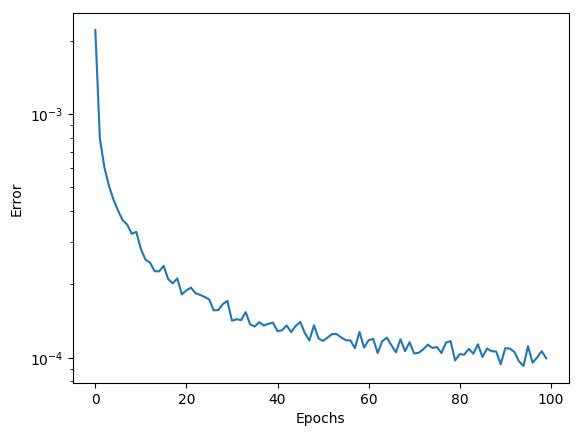

In [0]:
plt.plot(model_fit_hist.history['bpvol_error'])

plt.yscale('log')

plt.xlabel('Epochs')
plt.ylabel('Error')


In [0]:
Y_pred = model.predict(X_norm)

(0, 0.015764347823210522)

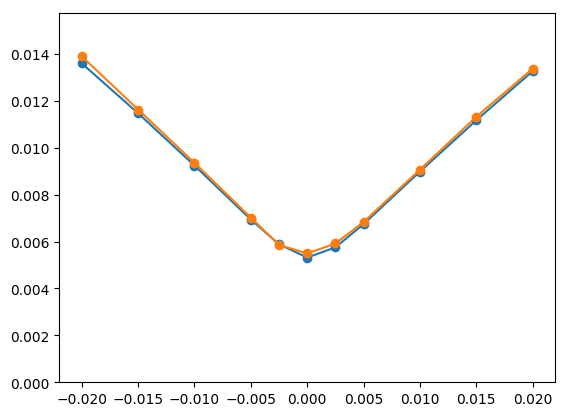

In [0]:
i = np.random.randint(0,20000)

plt.plot(strikes,vol[i,:],'o-') 
plt.plot(strikes, Y_pred[i,:],'o-')
#plt.title('Forward: ', X)
ax =  plt.gca()

aaa = ax.set_ylim()

ax.set_ylim(0,aaa[1]*1.1)

# A base de muchos ejemplos, la red neuronal, aprende lo que es el modelo SABR

In [0]:
import tensorflow as tf

def jacobian_tensorflow(x):    
    jacobian_matrix = []
    for m in range(11):
        # We iterate over the M elements of the output vector
        grad_func = tf.gradients(model.output[:, m], model.input)
        gradients = sess.run(grad_func, feed_dict={model.input: x.reshape((1, x.size))})
        jacobian_matrix.append(gradients[0][0,:])
        
    return np.array(jacobian_matrix)

In [0]:
alpha = 0.5

forward = 0.01

rho = 0.5

nu = 0.5

ttm = 1
grads = K.gradients(model.output[:,10], model.input)

sess = K.get_session()

examp = np.array([alpha,forward,rho,nu,ttm]).reshape(1,-1)

evaluated_gradients_1 = sess.run(grads, feed_dict={model.input: 
examp})


evaluated_gradients_1


[array([[ 4.60533511e-03,  1.50107957e-05, -2.69081531e-03,
          6.09763643e-03,  1.56148719e-03]])]

In [0]:
evaluated_gradients_1[0][0][3]

0.006097636429969177

In [0]:
v0 = model.predict(examp - np.array([0,0,0,1e-8,0]).reshape(1,-1))[0][10]

v1 = model.predict(examp + np.array([0,0,0,1e-8,0]).reshape(1,-1))[0][10]

print((v1-v0)/2e-8)


(v1-v0)/2e-8-evaluated_gradients_1[0][0][3]

0.006097636631730019


2.0176084240819403e-10

In [0]:
K.floatx()

'float64'

In [0]:
K.set_floatx('float64')


model.predict(examp - np.array([0,0,0,1e-5,0]).reshape(1,-1))[0][10]

188.21028